<a href="https://colab.research.google.com/github/y0tish/Book-Recommendation-system/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Book Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Yotish Lakhanpal 

# **Project Summary -**

In this project, we have built a recommendation system for books using collaborative filtering techniques and explored various data analysis and preprocessing steps.

The project started with loading three datasets: the book dataset containing information about books, the rating dataset containing user ratings for books, and the user dataset containing user information. We performed data wrangling tasks such as handling missing and duplicate values in the datasets.

After cleaning the data, we conducted exploratory data analysis (EDA) to gain insights into the datasets. We merged the three datasets based on common columns and analyzed the relationships between variables. EDA helped us understand the distribution of ratings, the popularity of different books, and the characteristics of users.

Next, we implemented a popularity-based recommendation system. This system recommended books based on their average ratings and weighted average ratings. It provided a basic recommendation approach that suggests popular books to users.

Moving on to collaborative filtering, we explored two approaches: memory-based and model-based. In the memory-based approach, we utilized cosine similarity and K-nearest neighbors (KNN) algorithms. We implemented user-based collaborative filtering and item-based collaborative filtering to predict user ratings and make recommendations. The evaluation of these approaches showed moderate accuracy in predicting user ratings.

For the model-based approach, we used Singular Value Decomposition (SVD). This matrix factorization technique helped us uncover latent factors and create a model for predicting user ratings. The SVD model demonstrated slightly better accuracy compared to the memory-based approaches, with average Mean Absolute Error (MAE) of 1.1522 and average Root Mean Squared Error (RMSE) of 1.5239. It proved effective in capturing underlying patterns and generating accurate recommendations.

In summary, this project involved data preprocessing, exploratory data analysis, and the implementation of popularity-based and collaborative filtering recommendation systems. We leveraged various techniques such as cosine similarity, KNN, and SVD to provide personalized book recommendations to users. The project showcased the importance of data cleaning, analysis, and model selection in building an effective recommendation system.

# **GitHub Link -**

https://github.com/y0tish/Book-Recommendation-system.git

# **Problem Statement**


**The objective of this project is to build a recommendation system for books that can provide personalized recommendations to users based on their preferences. The system should consider user ratings, book attributes, and user demographics to generate accurate and relevant book recommendations.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
!pip install scikit-surprise
from surprise import Dataset, Reader, KNNWithMeans
import surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095448 sha256=8703fac6094aedaba2f9a8c6460087a3699f7a83c7661f75bbf236283717521d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
book = pd.read_csv("/content/drive/MyDrive/capstone 4/Copy of Books.csv")
rating=pd.read_csv("/content/drive/MyDrive/capstone 4/Copy of Ratings.csv")
user=pd.read_csv("/content/drive/MyDrive/capstone 4/Copy of Users.csv")

<ipython-input-3-5818a6409a5a>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv("/content/drive/MyDrive/capstone 4/Copy of Books.csv")


### Dataset First View

In [4]:
# book Dataset First Look
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# rating Dataset First Look
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# user Dataset First Look
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count for book dataframe
print(f'Number of rows in book dataframe-{book.shape[0]}')
print(f'Number of columns in book dataframe-{book.shape[1]}')

Number of rows in book dataframe-271360
Number of columns in book dataframe-8


In [8]:
# Dataset Rows & Columns count for rating dataframe
print(f'Number of rows in rating dataframe-{rating.shape[0]}')
print(f'Number of columns in rating dataframe-{rating.shape[1]}')

Number of rows in rating dataframe-1149780
Number of columns in rating dataframe-3


In [9]:
# Dataset Rows & Columns count for user dataframe
print(f'Number of rows in user dataframe-{user.shape[0]}')
print(f'Number of columns in user dataframe-{user.shape[1]}')

Number of rows in user dataframe-278858
Number of columns in user dataframe-3


### Dataset Information

In [10]:
# Dataset Info of book dataframe
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
# Dataset Info of rating dataframe
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
# Dataset Info of user dataframe
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [13]:
# Datasets Duplicate Value Count 
print(f'Duplicate rows in book dataframe - {len(book[book.duplicated()])}')
print(f'Duplicate rows in rating dataframe - {len(rating[rating.duplicated()])}')
print(f'Duplicate rows in user dataframe - {len(user[user.duplicated()])}')

Duplicate rows in book dataframe - 0
Duplicate rows in rating dataframe - 0
Duplicate rows in user dataframe - 0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count for book dataframe
book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [15]:
# Missing Values/Null Values Count for rating dataframe
rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [16]:
# Missing Values/Null Values Count for user dataframe
user.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Text(0.5, 1.0, 'Non-Missing Values in book Dataset')

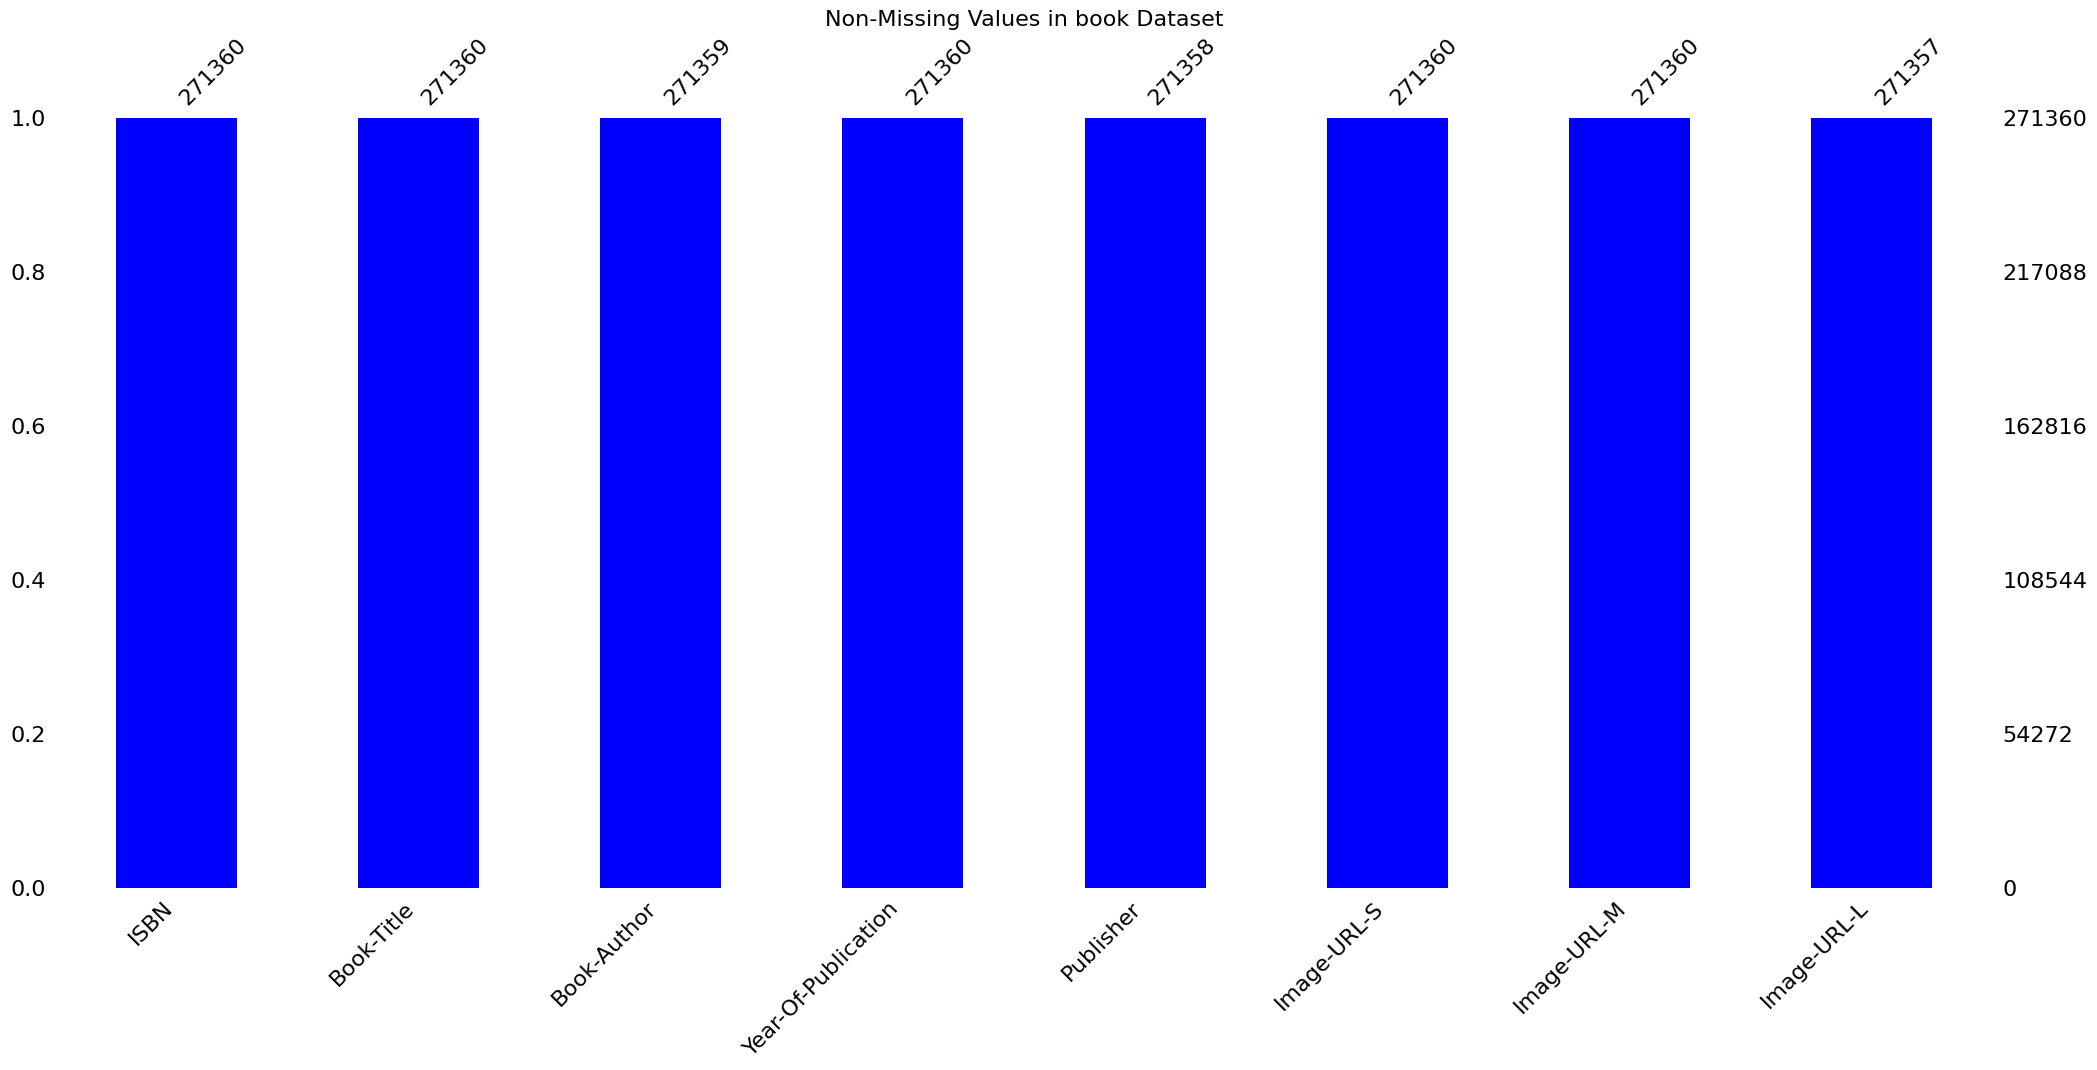

In [17]:
# Visualizing the missing values
# Generate bar chart of Non-missing values in book dataframe
msno.bar(book, color='blue')

# Set title and axis labels
plt.title('Non-Missing Values in book Dataset', fontsize=16)


* **There is total of 6 null values in book dataframe one is in Book-Author, two in Publisher and 3 in image Url-L.**

Text(0.5, 1.0, 'Non-Missing Values in rating Dataset')

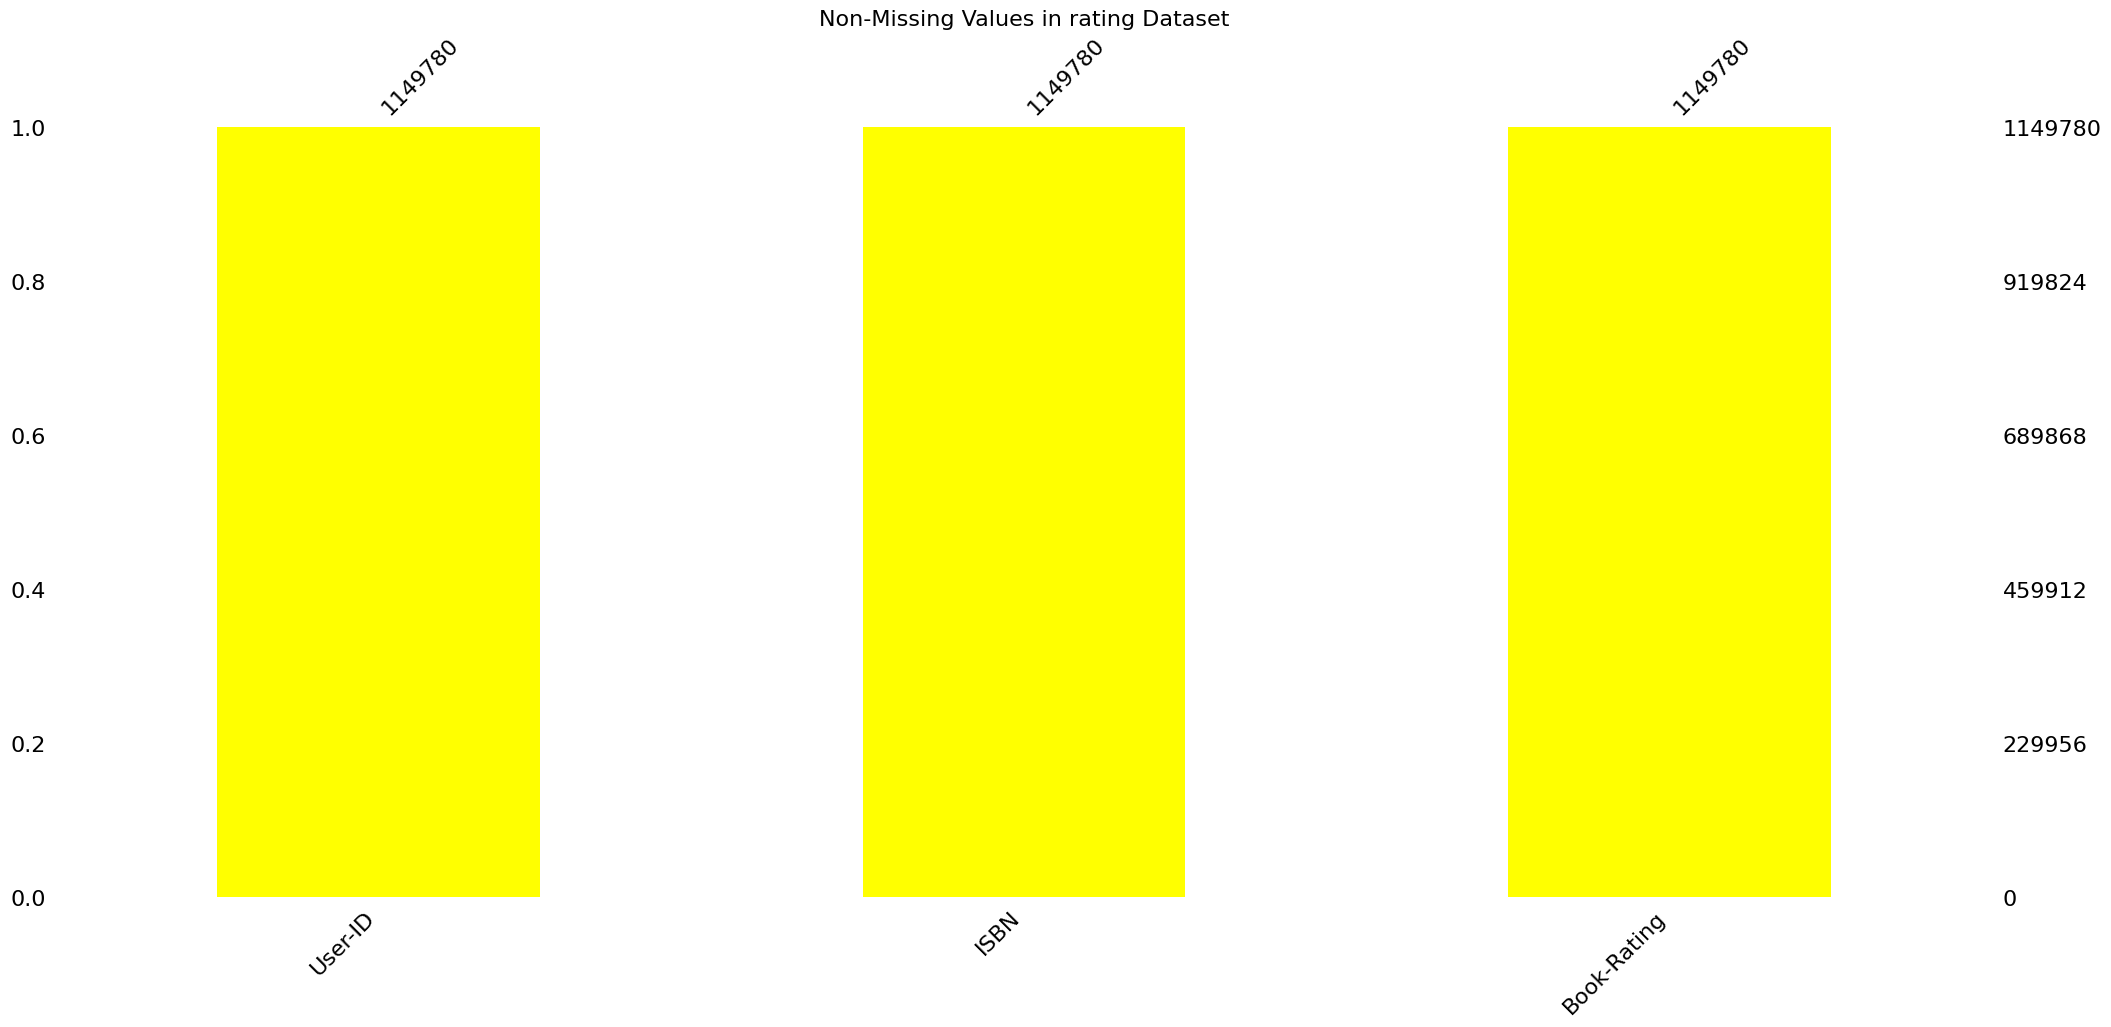

In [18]:
# Generate bar chart of Non-missing values in rating dataframe
msno.bar(rating, color='yellow')

# Set title and axis labels
plt.title('Non-Missing Values in rating Dataset', fontsize=16)

* **There are no null values in rating dataframe.**

Text(0.5, 1.0, 'Non-Missing Values in user Dataset')

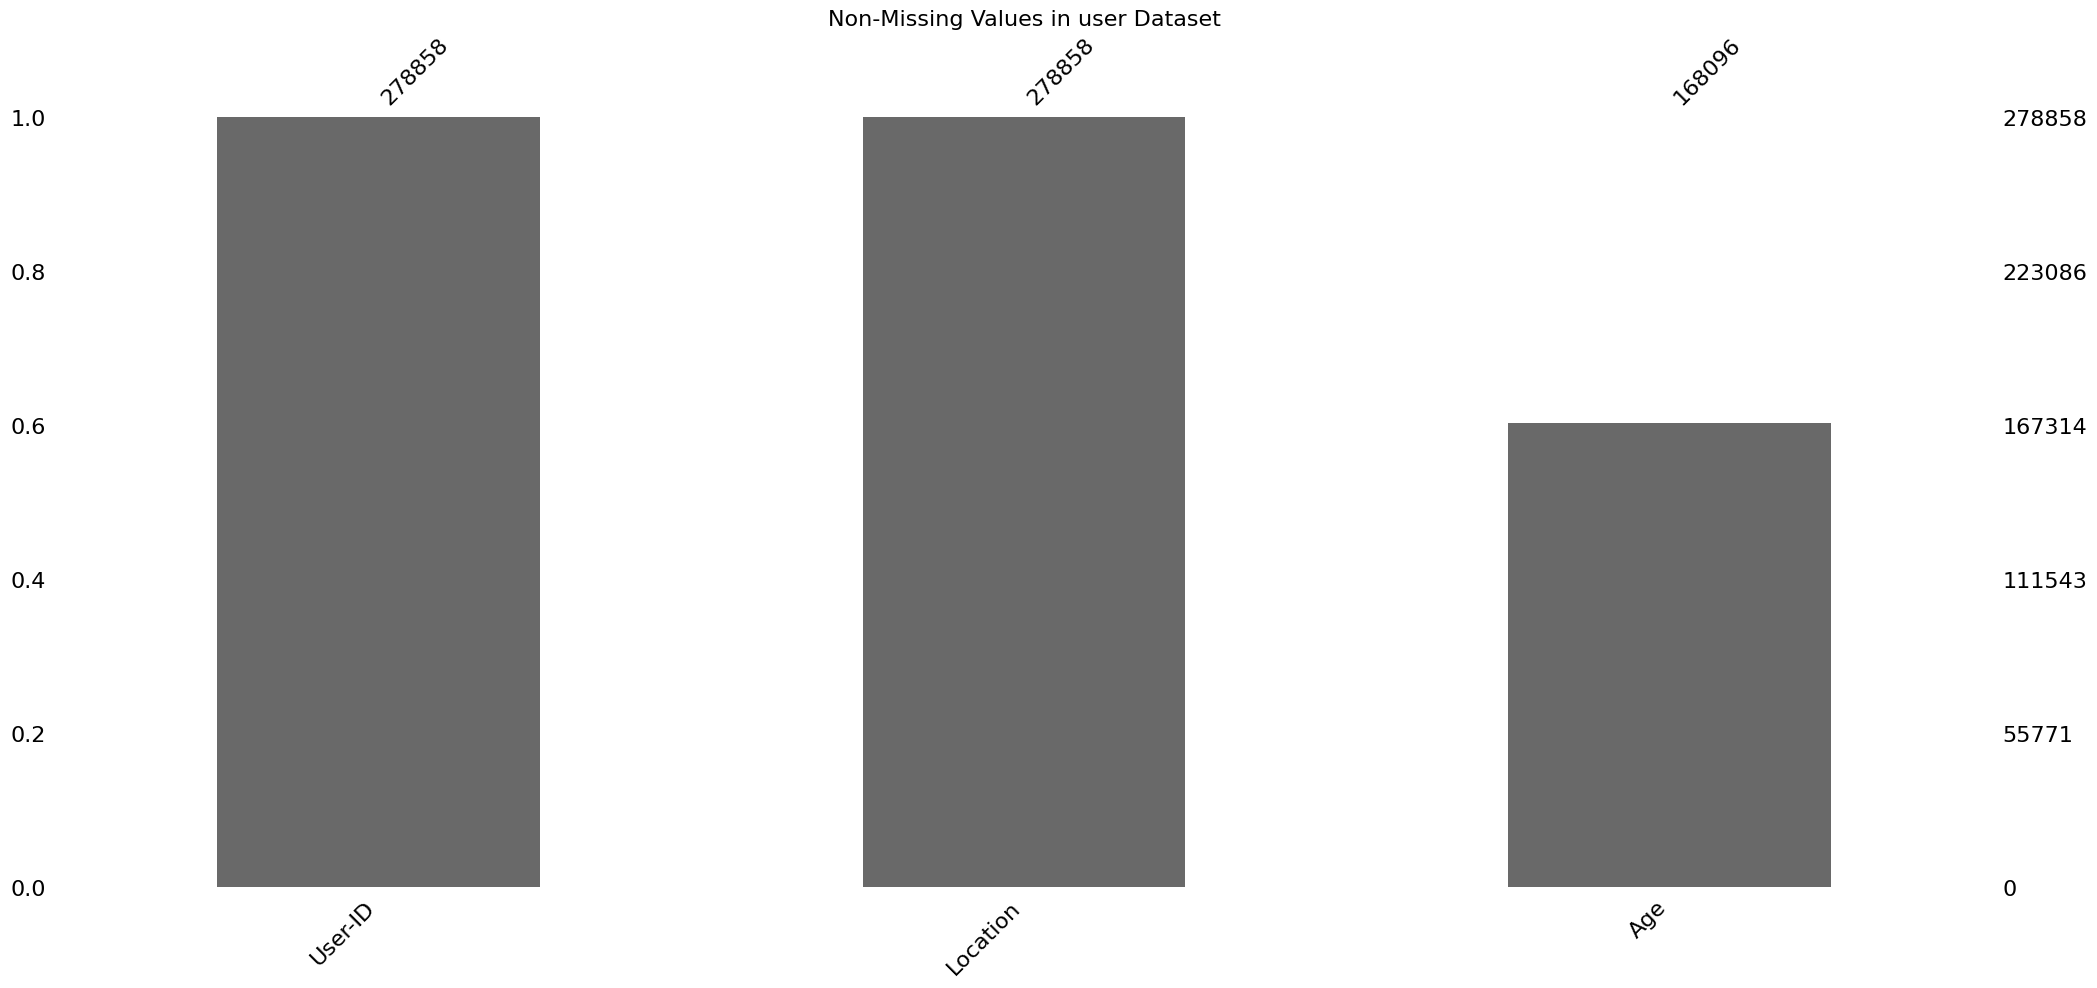

In [19]:
# Generate bar chart of Non-missing values in user dataframe
msno.bar(user)

# Set title and axis labels
plt.title('Non-Missing Values in user Dataset', fontsize=16)

* **Half of the user's ages are missing in User dataframe.**

### What did I know about my dataset?
* **There are 3 datasets** 

1.   **Book Dataset**
2.  **Rating Dataset**
3.  **User Dataset**
* **Null values are there is book and user dataset.**
* **There are total of 271360 books for which 1149780 of rating has done by 278858 of users.**



###Handling Missing Values

* **Handling Missing values for Book dataframe**

* **For Book-Author Column**

In [20]:
#Showing rows for which contain null values for Book-Author column
book[book['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


* **Through google search i was able to find the book author of the above book,Hence filling null value.**

In [21]:
#filling null value with author name
book['Book-Author']=book['Book-Author'].fillna('David K. Tait')

* **For Publisher Column.**

In [22]:
#Showing rows for which contain null values for Publisher column
book[book['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


* **Both books are published by Novelbooks Inc**

In [23]:
#filling null value with Publisher name 
book['Publisher']=book['Publisher'].fillna('Novelbooks Inc')

* **For Image-URL-L Column.**


In [24]:
#Showing rows for which contain null values for Image-URL-L column
book[book['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


* **Filling null values with "No Image Avalaible".**

In [25]:
#filling null values 
book['Image-URL-L']=book['Image-URL-L'].fillna('No Image Avalaible')

* **Handling missing Values For User dataset**

* **For Age column**

<Axes: xlabel='Age', ylabel='Count'>

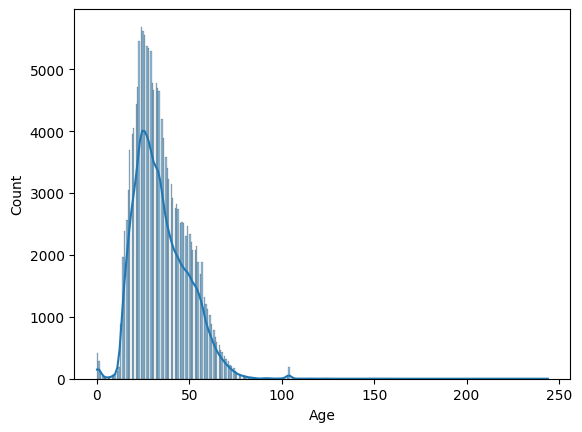

In [26]:
#Plotting Histogram for age column to see outliers
sns.histplot(x='Age',data=user,kde=True)

 * **Age column has outliers, Hence Fiiling the Null values with Median.**

In [27]:
#Filling null values of age column with its median
user['Age']=user['Age'].fillna(user['Age'].median())

## ***2. Understanding Your Variables***

In [28]:
# book Dataset Columns
book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [29]:
# rating Dataset columns
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [30]:
# user Dataset Column
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [31]:
# book Dataset Columns
book.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271360,271360,271360,271360,271360,271360
unique,271360,242135,102024,202,16808,271044,271044,271042
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,No Image Avalaible
freq,1,27,632,13903,7535,2,2,3


In [32]:
#rating Dataset Columns
rating.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [33]:
#user Dataset Columns
user.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,278858.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,33.658568
std,80499.51502,NaN,11.282618
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,29.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,35.000000


### Variables Description 

* **Book dataframe**
* ISBN: International Standard Book Number, a unique identifier for each book.
* Book-Title: Title of the book.
* Book-Author: Author of the book.
* Year-Of-Publication: Year when the book was published.
* Publisher: Publisher of the book.
* Image-URL-S: URL for the small-sized image of the book cover.
* Image-URL-M: URL for the medium-sized image of the book cover.
* Image-URL-L: URL for the large-sized image of the book cover.

---

* **Rating dataframe**
* User-ID: Unique identifier for each user
* ISBN: International Standard Book Number, a unique identifier for each book.
* Book-Rating: Rating given by the user for the book.

---

* **User dataframe**
* User-ID: Unique identifier for each user.
* Location: Location of the user.
* Age: Age of the user.


### Check Unique Values for each variable.

* **Checking Unique values for each variable for book dataframe.**

In [34]:
# Check Unique Values for Book-Title
book['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [35]:
#Check Unique values for Book-Author
book['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [36]:
#Check Unique values for Year-Of-Publication
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

* **There are some strings present in Year of publication and also there is 0 present in year of publication we have to take care of these values.**
* **Also some Year is greater than 2023 which is not possible, we have to change that also.**
* **We have to chage the dtye of this colum too.**





In [37]:
#Check Unique values for Publisher
book['Publisher'].unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

 * **Checking Unique values for each variable for rating dataframe.**

In [38]:
#Check Unique values for Book-Rating
rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

* **Checking Unique values for each variable for user dataframe.**

In [39]:
 #Check Unique values for Location
user['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [40]:
#Check Unique values for Age
user['Age'].unique()

array([ 32.,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  24.,
        20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,  37.,
        41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,  13.,
        58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,  40.,
        15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,  56.,
        67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64., 103.,
       104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,  11.,
        77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230., 239.,
        10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,  90.,
       123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97., 219.,
        86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162., 100.,
       156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199., 147.,
       168., 132., 159., 186., 152., 102., 116., 200., 115., 226., 137.,
       207., 229., 138., 109., 105., 228., 183., 20

* **Age has values greater than 100 which does not make any sense.**
* **Age Less than 5 also does not make any sense, Age is much less to read the books.**

## 3. ***Data Wrangling***

### Data Wrangling Code

* **Cleaning the Year of Publication Column.**

In [41]:
book[(book['Year-Of-Publication'] == 'DK Publishing Inc') | (book['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,No Image Avalaible
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,No Image Avalaible
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,No Image Avalaible


* **We can clearly see that in the above case that 2 columns Book-Author and Year of Publication has been swapped, we have to fix it.**

In [42]:
# Change the value in the 'Year-Of-Publication' column for the row with the matching ISBN number
book.loc[book['ISBN'] == '078946697X', 'Year-Of-Publication'] = 2000
book.loc[book['ISBN'] == '2070426769', 'Year-Of-Publication'] = 2003
book.loc[book['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000

In [43]:
# Change the value in the 'Book-Author' column for the row with the matching ISBN number
book.loc[book['ISBN'] == '078946697X', 'Book-Author'] = 'DK Publishing Inc'
book.loc[book['ISBN'] == '2070426769', 'Book-Author'] = 'Gallimard'
book.loc[book['ISBN'] == '0789466953', 'Book-Author'] = 'DK Publishing Inc'

In [44]:
#Changing the dtype of column
book['Year-Of-Publication']=book['Year-Of-Publication'].astype(int)

* **Some year of Publication are greater than 2023 and some has values 0, Let's see those Rows.**

In [45]:
book[(book['Year-Of-Publication'] > 2022) | (book['Year-Of-Publication'] == 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [46]:
# Making a Empty List
Data=[]
#converting column to list
yop_list=[i for i in book['Year-Of-Publication']]
for i in yop_list: #Applying for loop on yop_list
  if i > 2022 or i == 0:
    Data.append(book['Year-Of-Publication'].median())#Adding median value is place of those values
  else:
    Data.append(i)# Adding valid years to list
#Updating the Year of Publication column
book['Year-Of-Publication']=Data



<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

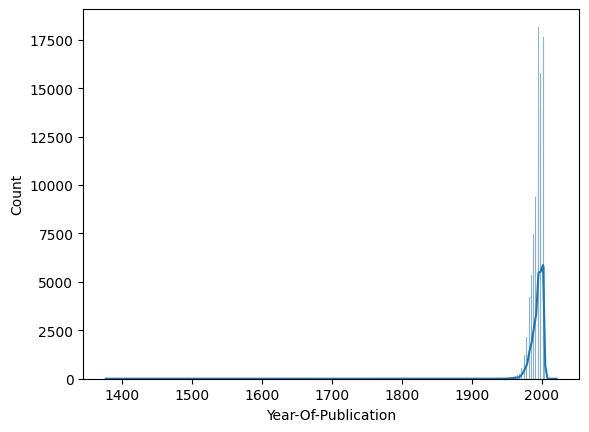

In [47]:
#Ploting Histogram of Year of Publication
sns.histplot(x=book['Year-Of-Publication'],kde=True)

* **Cleaning the Age Column in User dataframe.**

* **Fixing age values which is greater than 95 and less than 5.**

In [48]:
# Making a Empty List
Data=[]
#converting column to list
age_list=[i for i in user['Age']]
for i in age_list: #Applying for loop on age_list
  if i > 95 or i < 5:
    Data.append(user['Age'].median())#Adding median value is place of those values
  else:
    Data.append(i)# Adding valid age to list
#Updating the Age column
user['Age']=Data

* **Cleaning the Location column of user dataframe**

In [49]:
# create an empty list to store the country names
data = []

# iterate over the 'Location' column
for loc in user['Location']:
    # split the location string by commas
    loc_parts = loc.split(',')
    # if there are at least three parts, extract the third part (the country)
    if len(loc_parts) >= 3:
        country = loc_parts[2].strip()
    # otherwise, set the country to 'Unknown'
    else:
        country = 'Unknown'
    # append the country to the list
    data.append(country)

# update the 'Location' column with the country names
user['Location'] = data


In [50]:
#Value counts of Book Title
book['Book-Title'].value_counts().sort_values(ascending=False)

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
Design through discovery                                                                                                           1
Schmetterling.                                                       

In [51]:
#Value counts of Book Author
book['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: Book-Author, Length: 102024, dtype: int64

In [52]:
#Value counts of Year of Publication
book['Year-Of-Publication'].value_counts()

1995.0    18177
2002.0    17627
1999.0    17431
2001.0    17359
2000.0    17234
          ...  
1917.0        1
1910.0        1
1934.0        1
1904.0        1
1376.0        1
Name: Year-Of-Publication, Length: 109, dtype: int64

In [53]:
#Value counts of Book Ratings
rating['Book-Rating'].value_counts().sort_values()

1       1770
2       2759
3       5996
4       8904
6      36924
5      50974
9      67541
7      76457
10     78610
8     103736
0     716109
Name: Book-Rating, dtype: int64

In [54]:
#Value counts of location of users
user['Location'].value_counts().sort_values(ascending=False)

usa                139188
canada              21558
united kingdom      18286
germany             17022
spain               13096
                    ...  
north sumatera          1
il                      1
galiza neghra           1
chinaöð¹ú               1
united kingdom.         1
Name: Location, Length: 1087, dtype: int64

In [55]:
#Value counts of aAge of users
user['Age'].value_counts().sort_values(ascending=False)

32.0    116810
24.0      5687
25.0      5618
26.0      5547
23.0      5456
         ...  
90.0         5
94.0         5
89.0         2
88.0         2
95.0         1
Name: Age, Length: 91, dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Number of Books')

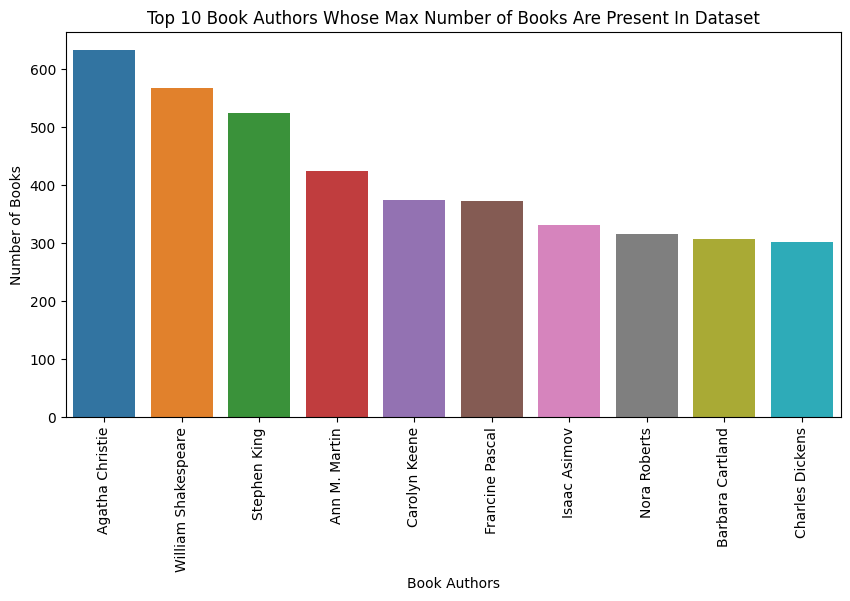

In [56]:
# Chart - 2 visualization code
#Top 10 Book Author in Book dataframe
Top_10_book_author=book['Book-Author'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Author_Name','Book-Author':'No. of Books'}).head(10)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 book author
sns.barplot(x='Author_Name',y='No. of Books',data=Top_10_book_author)
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Book Authors Whose Max Number of Books Are Present In Dataset')
plt.xlabel('Book Authors')
plt.ylabel('Number of Books')

* **Agatha Christie is the author with the highest number of books, having written 632 books.**
* **William Shakespeare is the second most prolific author with 567 books.**
* **Stephen King follows closely with 524 books.**

#### Chart - 2

Text(0, 0.5, 'Number of Books')

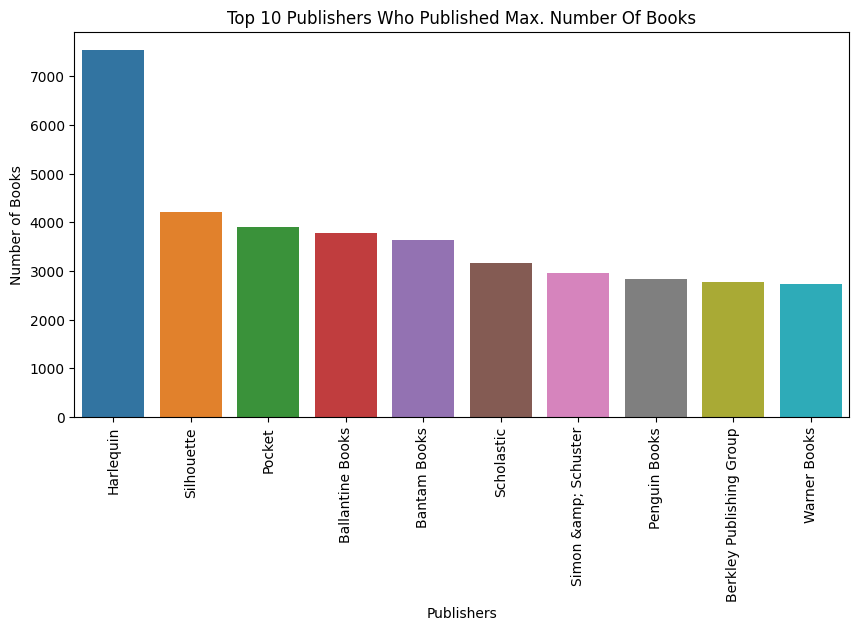

In [57]:
# Chart - 2 visualization code
#Top 10 Publisher
Top_10_publisher=book['Publisher'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Publisher_Name','Publisher':'No. of Books'}).head(10)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 publisher
sns.barplot(x='Publisher_Name',y='No. of Books',data=Top_10_publisher)
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Publishers Who Published Max. Number Of Books')
plt.xlabel('Publishers')
plt.ylabel('Number of Books')
     

* **Harlequin is the publisher with the highest number of books, having published 7535 books.**
* **Silhouette is the second most prolific publisher with 4220 books.**
* **Pocket follows closely with 3905 books.**

####**Merging my all Three Datasets**

In [58]:
#Merging all three dataset into one
df = pd.merge(book,rating, on='ISBN', how='inner')
df = pd.merge(df, user, on='User-ID', how='inner')

In [59]:
#Shape of overall dataframe
df.shape

(1031136, 12)

In [60]:
#Showing dataframe
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,usa,18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,canada,32.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,canada,32.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,canada,32.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,canada,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,usa,19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,usa,39.0
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,spain,22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,usa,27.0


In [61]:
#Info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  float64
 4   Publisher            1031136 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031136 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  1031136 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 102.3+ MB


In [62]:
#Any duplicate values
df.duplicated().sum()

0

In [63]:
#Describe of df
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ISBN,1031136,270151,0971880107,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Book-Title,1031136,241071,Wild Animus,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Book-Author,1031136,101589,Stephen King,10053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year-Of-Publication,1031136.0,NaN,NaN,NaN,1995.297072,7.308335,1376.0,1992.0,1997.0,2001.0,2021.0
Publisher,1031136,16730,Ballantine Books,34724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Image-URL-S,1031136,269842,http://images.amazon.com/images/P/0971880107.0...,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Image-URL-M,1031136,269842,http://images.amazon.com/images/P/0971880107.0...,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Image-URL-L,1031136,269840,http://images.amazon.com/images/P/0971880107.0...,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User-ID,1031136.0,NaN,NaN,NaN,140594.503506,80524.659039,2.0,70415.0,141210.0,211426.0,278854.0
Book-Rating,1031136.0,NaN,NaN,NaN,2.839051,3.854157,0.0,0.0,0.0,7.0,10.0


#### Chart - 4

Text(0, 0.5, 'Sum of Ratings')

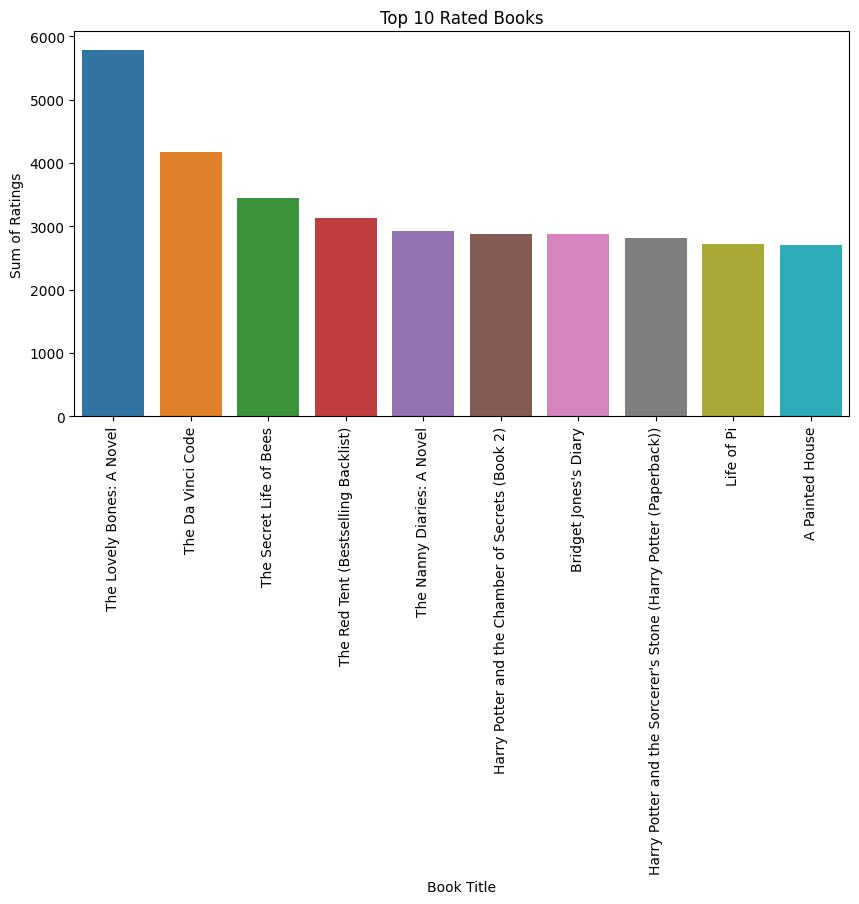

In [64]:
# Chart - 4 visualization code 
#Making a dataframe that shows sum of rating on each book
df1=df.groupby('Book-Title')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating',ascending=False)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 rated books
sns.barplot(x='Book-Title',y='Book-Rating',data=df1.head(10))
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Sum of Ratings')

* **The Lovely Bones, The Da Vinci Code,The Secret Life Of Bees are the highly rated books among users in the dataset.**

#### Chart - 5

Text(0, 0.5, 'Sum of Ratings')

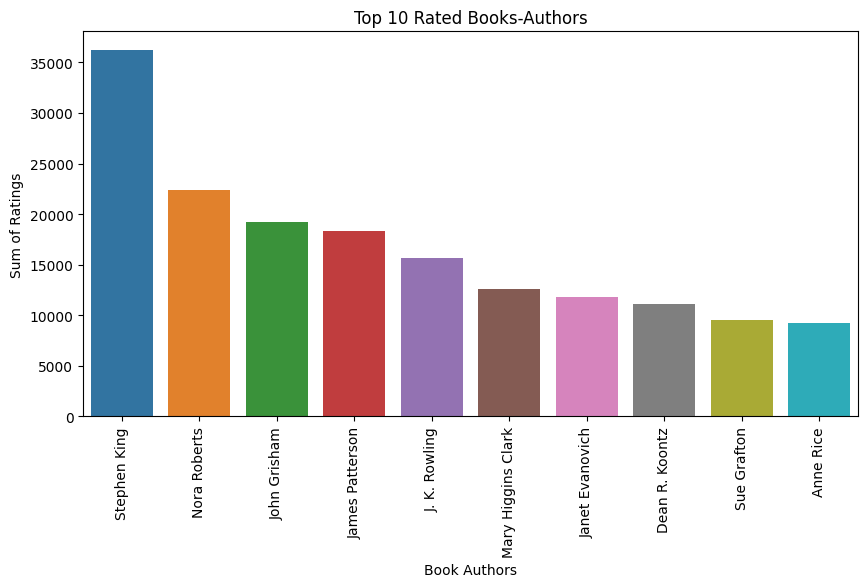

In [65]:
# Chart - 5 visualization code
#Making a dataframe that shows sum of rating on each book-Authors
df1=df.groupby('Book-Author')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating',ascending=False)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 Rated books-authors
sns.barplot(x='Book-Author',y='Book-Rating',data=df1.head(10))
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Rated Books-Authors')
plt.xlabel('Book Authors')
plt.ylabel('Sum of Ratings')

* **Stephen King has the highest number of book ratings with 36,254 ratings. This indicates that Stephen King's books have garnered significant attention and engagement from readers.**
* **Nora Roberts follows closely with 22,416 book ratings, indicating a substantial readership and popularity of her books.**
* **John Grisham has received 19,184 book ratings, reflecting his strong presence and appeal in the literary world.**

#### Chart - 6

Text(0, 0.5, 'Sum of Ratings')

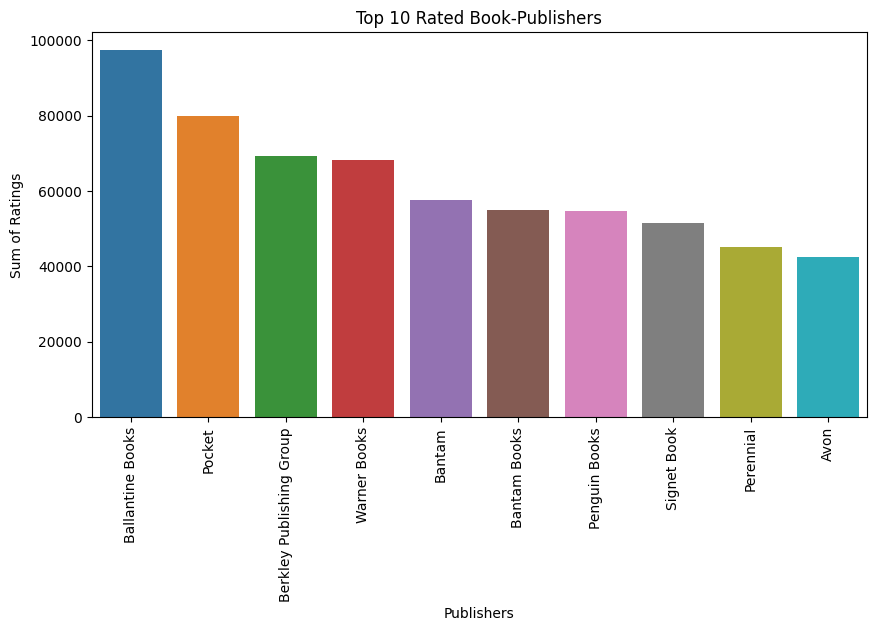

In [66]:
# Chart - 6 visualization code
#Making a dataframe that shows sum of rating on each Publishers
df2=df.groupby('Publisher')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating',ascending=False)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 rated Publishers
sns.barplot(x='Publisher',y='Book-Rating',data=df2.head(10))
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Rated Book-Publishers')
plt.xlabel('Publishers')
plt.ylabel('Sum of Ratings')

* **Top Rated Publishers for which users given max. ratings are Ballantine Books, Pocket, Berkley Publishing Group.**

#### Chart - 7

Text(0, 0.5, 'Number Of Users')

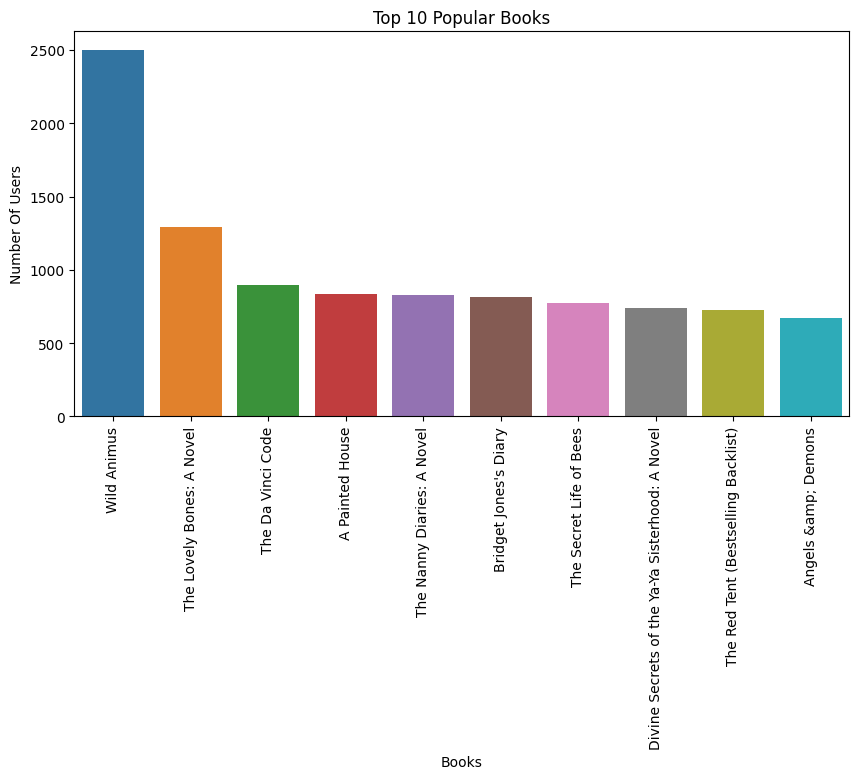

In [67]:
# Chart - 7 visualization code
#Making a dataframe that shows popular books among users
df1=df.groupby('Book-Title')['User-ID'].count().reset_index().sort_values(by='User-ID',ascending=False)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 popular books
sns.barplot(x='Book-Title',y='User-ID',data=df1.head(10))
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Popular Books')
plt.xlabel('Books')
plt.ylabel('Number Of Users')

* **Wild Animus is the book which got most number of rating(count) and hence read by most number of users.**

#### Chart - 8

Text(0, 0.5, 'Number Of Users')

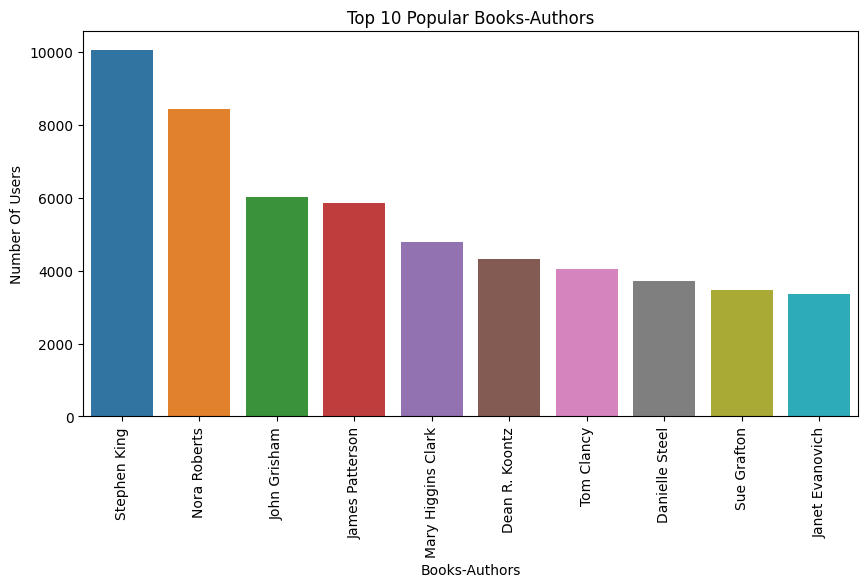

In [68]:
# Chart - 8 visualization code
#Making a dataframe that shows popular books-authors among users
df1=df.groupby('Book-Author')['User-ID'].count().reset_index().sort_values(by='User-ID',ascending=False)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 popular books authors
sns.barplot(x='Book-Author',y='User-ID',data=df1.head(10))
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Popular Books-Authors')
plt.xlabel('Books-Authors')
plt.ylabel('Number Of Users')

* **Mostly users are reading the books of Stephjan king, Nora Roberts and John Grishman.**

#### Chart - 9

Text(0, 0.5, 'Number Of Users')

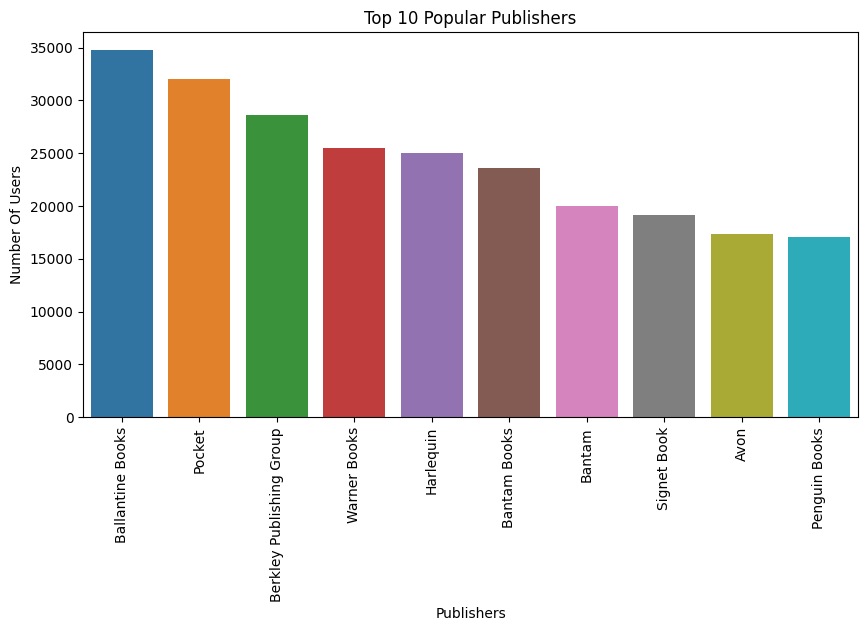

In [69]:
# Chart - 9 visualization code
#Making a dataframe that shows popular Publishers among users
df1=df.groupby('Publisher')['User-ID'].count().reset_index().sort_values(by='User-ID',ascending=False)
# Set the size of the figure to be 10x5 inches
plt.figure(figsize=(10, 5))
#Plotting the bar plot top 10 popular Publishers
sns.barplot(x='Publisher',y='User-ID',data=df1.head(10))
# Rotate the x-axis labels by 90 degrees to avoid overlapping text
plt.xticks(rotation=90)

# Set the title, x-label, and y-label for the plot
plt.title('Top 10 Popular Publishers')
plt.xlabel('Publishers')
plt.ylabel('Number Of Users')

#### Chart - 10

In [70]:

def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [71]:
df['Age_group']=df['Age'].apply(lambda x: age_group(x))

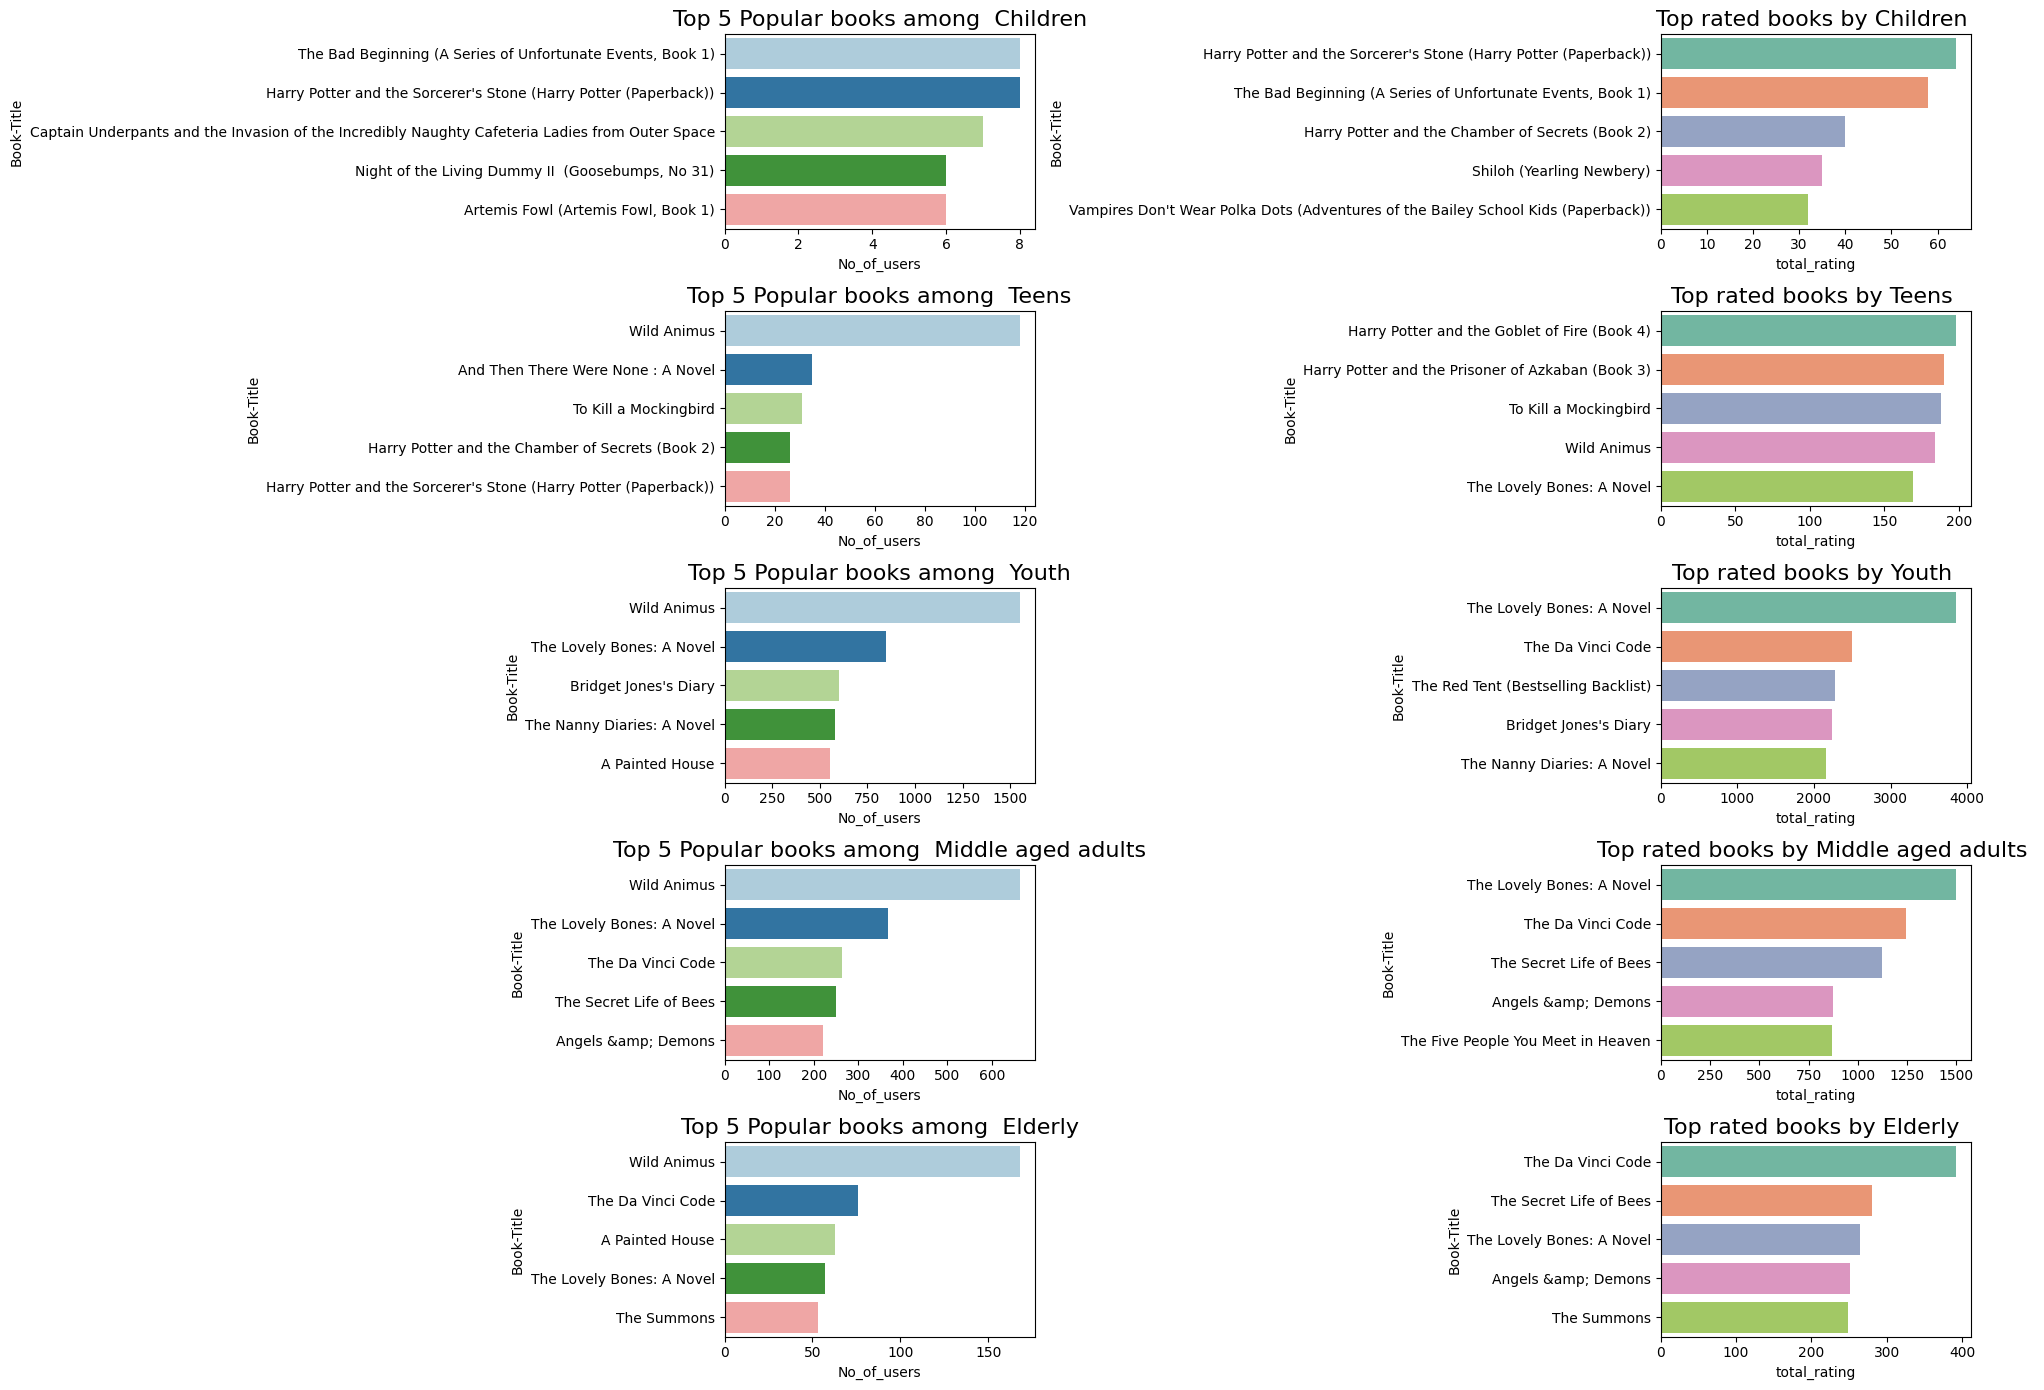

In [72]:
# Chart - 10 visualization code
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','count'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

#### Chart - 11

In [73]:
# Chart - 11 visualization
#Defining Numerocal Features  
numerical_feature=['Year-Of-Publication','Book-Rating','Age']

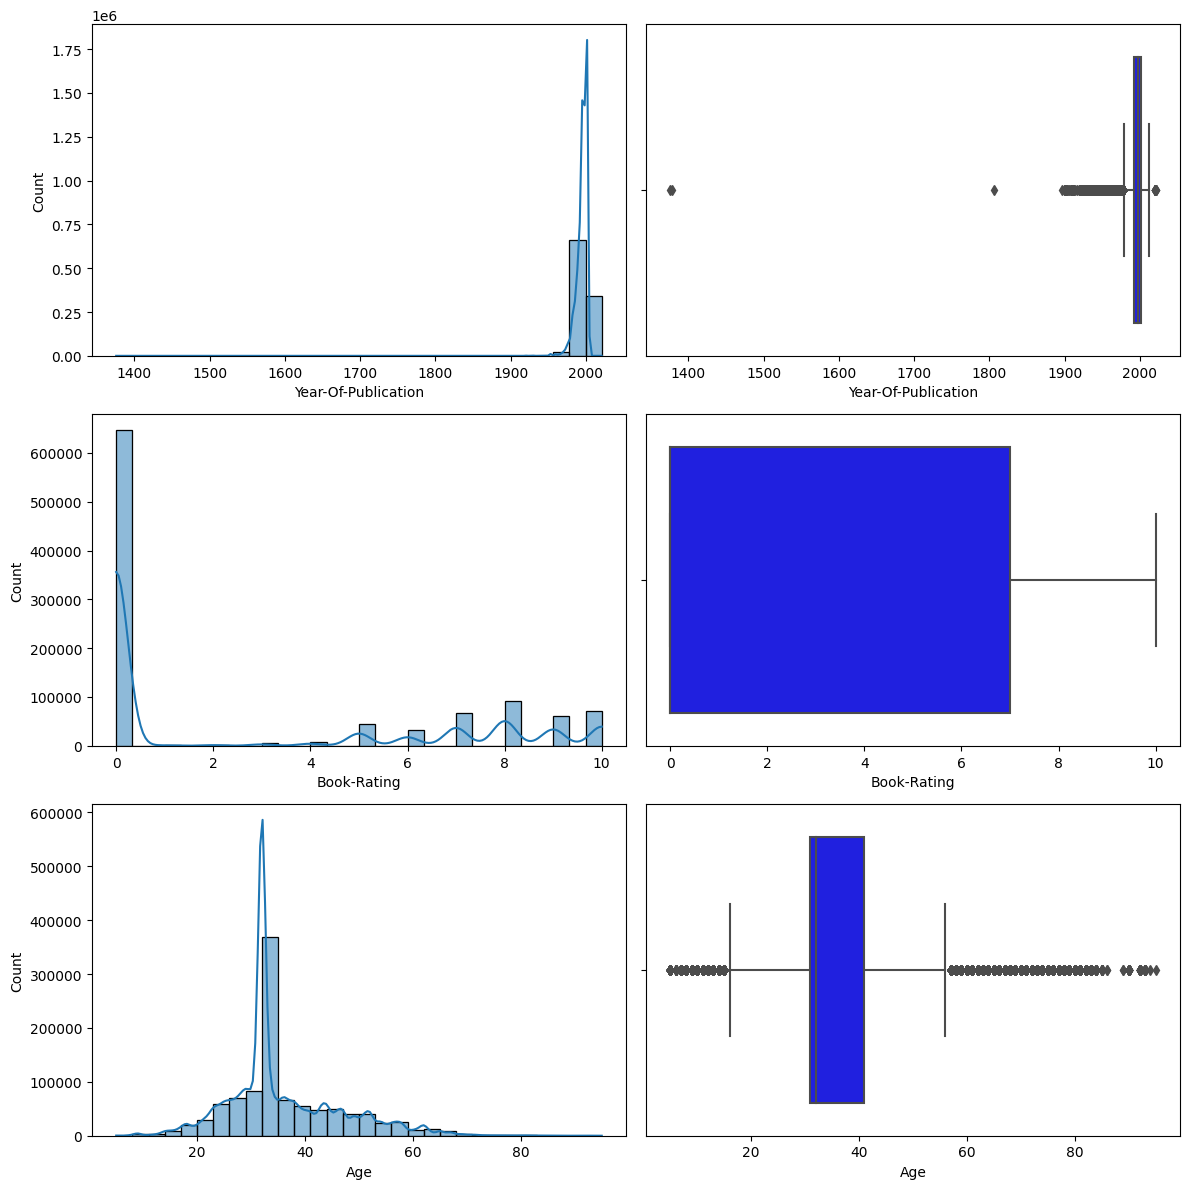

In [74]:
#set up subplots grid
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(12,12))
#Loop over numerical feature dataframe 
for i,col in enumerate(df[numerical_feature].columns):
  #Determine the subplots index for this column
  row_index= i%3
  column_index=i//3
  #create histogram and boxplot
  sns.histplot(x=col,data=df[numerical_feature],ax=axs[row_index,column_index],kde=True,bins=30)
  sns.boxplot(x=col,data=df,ax=axs[row_index,column_index+1],color='blue')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

* **Most of the Books in the dataset are published in between 1990-2020, one books is also published around 1370.(outlier)**
* **Most book rating is 0.**
* **The age of the Users vary between 15-100, but most common age of users are between 30-40 and also there are some outlier present in Age column.**  

#### Chart - 12 - Correlation Heatmap

<Axes: >

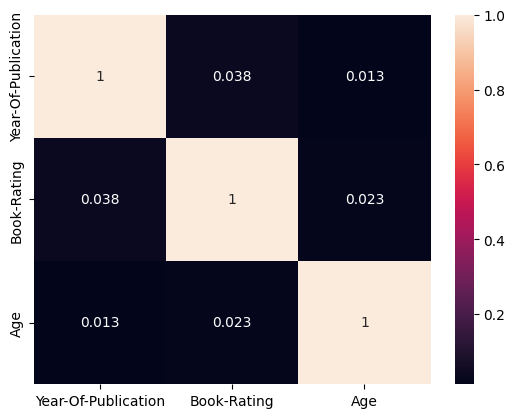

In [75]:
# Chart - 12 visualization code
sns.heatmap(abs(df[numerical_feature].corr()),annot=True)

* **There is no such relationship between the numerical columns or features.** 

#### Chart - 13 - Pair Plot

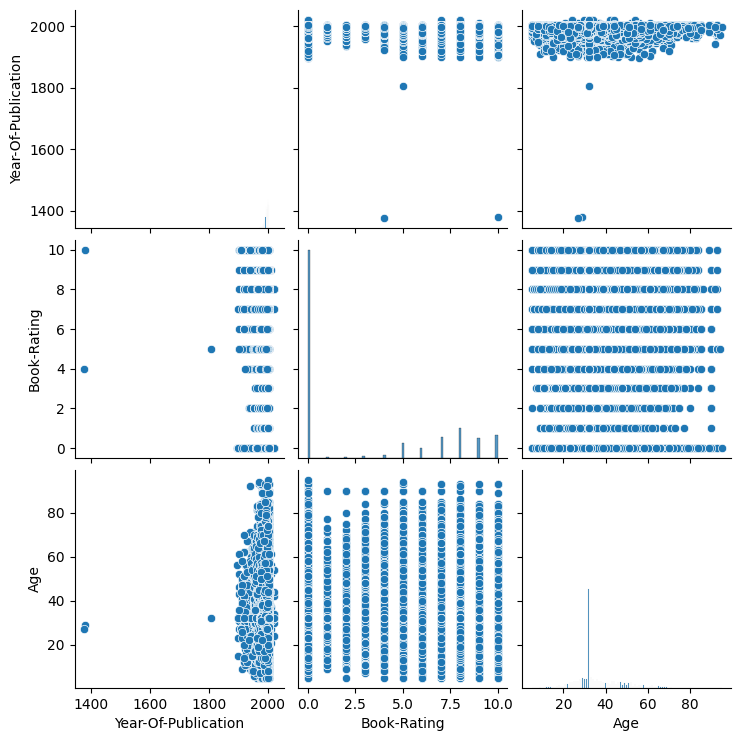

In [76]:
# Chart - 13 visualization code
sns.pairplot(df[numerical_feature])

* **One of the old published books got good rstings.**
* **Interestingly, middle age people like old published books as well as newly published books and old age people are liking newly published books.**
* **

##Popularity-Based Book Recommendation System

Weighted average rating method
Using Weighted average for each Book’s Average Rating

W = (Rv + Cm)/(v + m)

where

W= Weighted Rating

R = Average of the Books rating

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [78]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['Book-Title','Book-Author','Publisher','Image-URL-M'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}')

The average rating of all the books is 2.8842112011581498 and the minimum number of votes required by the books to be listed is 7


In [79]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [80]:
popular_df=df_relevant_data.sort_values(by='weighted_average',ascending=False).head(50)
popular_df

,Book-Title,Book-Author,Publisher,Image-URL-M,avg_rating,ratings_count,weighted_average
78692,Free,Paul Vincent,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,7.962963,54,7.38
199374,The Blue Day Book: A Lesson in Cheering Yourse...,Bradley Trevor Greive,Random House Australia,http://images.amazon.com/images/P/0091842050.0...,9.181818,11,6.73
52870,Death: The High Cost of Living,Neil Gaiman,DC Comics,http://images.amazon.com/images/P/1563891336.0...,9.444444,9,6.57
197245,The Baby Book: Everything You Need to Know Abo...,Martha Sears,"Little, Brown",http://images.amazon.com/images/P/0316779059.0...,8.461538,13,6.51
89789,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064864.0...,6.611765,170,6.46
243245,There's Treasure Everywhere--A Calvin and Hobb...,Bill Watterson,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836213122.0...,7.882353,17,6.42
129517,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,Edgehill Books,http://images.amazon.com/images/P/0615116426.0...,8.066667,15,6.42
4842,A Letter to Mrs. Roosevelt,C. COCO DE YOUNG,Delacorte Books for Young Readers,http://images.amazon.com/images/P/0385326335.0...,9.500000,8,6.41
89799,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,6.541237,194,6.41
232317,The Shrinking of Treehorn,Florence Parry Heide,Holiday House,http://images.amazon.com/images/P/0823401898.0...,9.500000,8,6.41


##**Collaborative filtering**

## **Memory Based Approach.**

* **We will take only those users who have rated more than 200 books.**
* **We will take those Books on which Atleast 50 ratings has been done by some users.**

* **Collaborative Filtering Recommendation System using Cosine Similarity**

In [81]:
#Those users who have rated more than 200 books
x=df.groupby('User-ID')['Book-Rating'].count()>200
final_users=x[x].index #Storing index of those users
#Fetching these users's rating from our orginal dataframe df
filter_df=df[df['User-ID'].isin(final_users)]
filter_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Age_group
80,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,n/a,32.0,Youth
81,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,n/a,32.0,Youth
82,0671870432,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,11676,8,n/a,32.0,Youth
83,0771074670,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,http://images.amazon.com/images/P/0771074670.0...,11676,0,n/a,32.0,Youth
84,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,n/a,32.0,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897052,0451406184,Petticoats and Pistols (Topaz Historical Roman...,Margaret Brownley,1995.0,Topaz,http://images.amazon.com/images/P/0451406184.0...,http://images.amazon.com/images/P/0451406184.0...,http://images.amazon.com/images/P/0451406184.0...,72352,0,spain,49.0,Middle aged adults
897053,0505521423,Savage Whispers (Savage),Cassie Edwards,1996.0,Love Spell,http://images.amazon.com/images/P/0505521423.0...,http://images.amazon.com/images/P/0505521423.0...,http://images.amazon.com/images/P/0505521423.0...,72352,0,spain,49.0,Middle aged adults
897054,0451408438,Silver Wing (Topaz Historical Romance),Cassie Edwards,1999.0,Topaz,http://images.amazon.com/images/P/0451408438.0...,http://images.amazon.com/images/P/0451408438.0...,http://images.amazon.com/images/P/0451408438.0...,72352,0,spain,49.0,Middle aged adults
897055,0821764667,Her Only Hero (Zebra Splendor Historical Roman...,Jo Ann Ferguson,2000.0,Kensington Publishing Corporation,http://images.amazon.com/images/P/0821764667.0...,http://images.amazon.com/images/P/0821764667.0...,http://images.amazon.com/images/P/0821764667.0...,72352,8,spain,49.0,Middle aged adults


In [82]:
#Those books which has atleast 50 rating on them in our newly filter_df
y=filter_df.groupby('Book-Title')['Book-Rating'].count()>=50
final_books=y[y].index #Storing index of those books
#Fetching these books from our orginal dataframe filter_df
filter_df=filter_df[filter_df['Book-Title'].isin(final_books)]
filter_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Age_group
81,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,n/a,32.0,Youth
84,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,n/a,32.0,Youth
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,11676,8,n/a,32.0,Youth
88,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,6,n/a,32.0,Youth
89,0345402871,Airframe,Michael Crichton,1997.0,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,11676,0,n/a,32.0,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822258,0670894184,Back Roads,Tawni O'Dell,2000.0,Viking Books,http://images.amazon.com/images/P/0670894184.0...,http://images.amazon.com/images/P/0670894184.0...,http://images.amazon.com/images/P/0670894184.0...,165232,5,usa,23.0,Youth
822263,0670858692,Rose Madder,Stephen King,1995.0,Viking Books,http://images.amazon.com/images/P/0670858692.0...,http://images.amazon.com/images/P/0670858692.0...,http://images.amazon.com/images/P/0670858692.0...,165232,0,usa,23.0,Youth
896868,1551668874,Heartbreaker,Linda Howard,2002.0,Mira,http://images.amazon.com/images/P/1551668874.0...,http://images.amazon.com/images/P/1551668874.0...,http://images.amazon.com/images/P/1551668874.0...,72352,0,spain,49.0,Middle aged adults
896905,0671670069,Guardian Angel,Julie Garwood,1990.0,Pocket,http://images.amazon.com/images/P/0671670069.0...,http://images.amazon.com/images/P/0671670069.0...,http://images.amazon.com/images/P/0671670069.0...,72352,10,spain,49.0,Middle aged adults


In [83]:
#User-Item Matrix
user_item=filter_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
#Filling missing values
user_item.fillna(0,inplace=True)
user_item

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#finding out similarity score
similarity_scores=cosine_similarity(user_item)

In [85]:
similarity_scores.shape

(706, 706)

In [86]:
#making function for rercommendation system
def recommend(book_name):
  '''Recommend top 10 similar books'''
  #Fetching index of book_name from user_item matrix
  index=np.where(user_item.index==book_name)[0][0]
  #fetching index of those books which are similar to book_name
  similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]
  #for loop over similar_items
  for i in similar_items:
    print(user_item.index[i[0]])


In [87]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Witness
The Firm
The Secret Garden


* **KNN Based Algorithm**

In [88]:
#Split the data into train and test sets.
train_data, test_data = train_test_split(filter_df, test_size=0.2, random_state=42)

In [89]:
# Select relevant columns for recommendation
selected_columns = ['User-ID', 'Book-Title', 'Book-Rating']

# Create a pivot table of user-book ratings
pivot_table = train_data[selected_columns].pivot_table(
    index='Book-Title', columns='User-ID', values='Book-Rating'
)

# Fill missing values with 0 (assumes missing values mean no rating)
pivot_table = pivot_table.fillna(0)
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# Convert the pivot table to a NumPy array
data_array = pivot_table.values

# Create the nearest neighbors model
neigh = NearestNeighbors(metric='cosine', algorithm='brute')
neigh.fit(data_array)

NearestNeighbors(algorithm='brute', metric='cosine')

In [91]:
# Making function for recommendation system
def recommendwithhknn(book_name):
    '''Recommend top 10 similar books'''
    # Fetching index of book_name from user_item matrix
    index = np.where(pivot_table.index == book_name)[0][0]
    
    # Fetching index of those books which are similar to book_name
    distances, indices = neigh.kneighbors(data_array[index].reshape(1, -1), n_neighbors=11)
    
    # Get the recommendations for the user
    recommendations = pivot_table.iloc[indices.flatten()].index.tolist()[1:]
    
    # Print the recommended books
    for book in recommendations:
        print(book)


In [92]:
recommendwithhknn('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Here on Earth
Bridge to Terabithia
The Witness


* **KNN With Means Algorithm(Item Based Collebrative Filtering)**



In [93]:
# Exclude zero ratings from the dataset
filter_df = filter_df[filter_df['Book-Rating'] != 0]

# Convert filter_df to Surprise dataset format
reader = Reader(rating_scale=(1, 10))  # Adjust the rating scale accordingly
data = Dataset.load_from_df(filter_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Define the algorithm
algo_item_based = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': False})

# Split the data into train and test sets
trainset = data.build_full_trainset()
# Fit the algorithm on the training set
algo_item_based.fit(trainset)

# Make predictions or generate recommendations
# For example, let's make predictions for a specific item
target_item = 'Harry Potter and the Chamber of Secrets (Book 2)'  # Replace with the desired book title
target_users = filter_df['User-ID'].unique()  # Get all unique user IDs

predictions = []
for user in target_users:
    predicted_rating = algo_item_based.predict(uid=user, iid=target_item)
    predictions.append((user, predicted_rating))
 
# Sort the predictions based on the predicted ratings (in descending order)
predictions.sort(key=lambda x: x[1].est, reverse=True)

# Print the top recommended users for the target item
top_n = 10  # Number of top recommendations to show
print(f"Top {top_n} recommended users for item '{target_item}':")
for user, rating in predictions[:top_n]:
    print(f"User: {user}, Predicted Rating: {rating}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Top 10 recommended users for item 'Harry Potter and the Chamber of Secrets (Book 2)':
User: 36836, Predicted Rating: user: 36836      item: Harry Potter and the Chamber of Secrets (Book 2) r_ui = None   est = 10.00   {'actual_k': 4, 'was_impossible': False}
User: 200674, Predicted Rating: user: 200674     item: Harry Potter and the Chamber of Secrets (Book 2) r_ui = None   est = 10.00   {'actual_k': 6, 'was_impossible': False}
User: 52614, Predicted Rating: user: 52614      item: Harry Potter and the Chamber of Secrets (Book 2) r_ui = None   est = 10.00   {'actual_k': 6, 'was_impossible': False}
User: 3363, Predicted Rating: user: 3363       item: Harry Potter and the Chamber of Secrets (Book 2) r_ui = None   est = 10.00   {'actual_k': 2, 'was_impossible': False}
User: 177090, Predicted Rating: user: 177090     item: Harry Potter and the Chamber of Secrets (Book 2) r_ui = None   est = 10.00   {'actual_k': 10, '

* **we can see the top 10 recommended users for the book 'Harry Potter and the Chamber of Secrets (Book 2)'. All of these users have an estimated rating of 10.00 for this book. The 'actual_k' value represents the number of neighbors (similar users) considered for making the prediction, and 'was_impossible' indicates whether it was possible to make the prediction.**
* **Based on these predictions, we can conclude that these users are highly likely to have a strong interest in and give a perfect rating to the book 'Harry Potter and the Chamber of Secrets (Book 2)'. The fact that all the estimated ratings are 10.00 suggests a very high level of similarity and positive sentiment among these users.**
* **In some cases the actual_k is very less used,The reason for a lower number of neighbors could be the sparsity of the data.**

* **KNN With Means Algorithm(User Based Collebrative Filtering)**

In [94]:
# Exclude zero ratings from the dataset
filter_df = filter_df[filter_df['Book-Rating'] != 0]
# Convert filter_df to Surprise dataset format
reader = Reader(rating_scale=(1, 10))  # Adjust the rating scale accordingly
data = Dataset.load_from_df(filter_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Define the algorithm
algo_user_based = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': True})

# Split the data into train and test sets
trainset = data.build_full_trainset()

# Fit the algorithm on the training set
algo_user_based.fit(trainset)

# Make predictions or generate recommendations
# For example, let's make predictions for a specific user
target_user = 2977  # Replace with the desired user ID
target_items = filter_df['Book-Title'].unique()  # Get all unique book titles

predictions = []
for item in target_items:
    predicted_rating = algo_user_based.predict(uid=target_user, iid=item)
    predictions.append((item, predicted_rating))

# Sort the predictions based on the predicted ratings (in descending order)
predictions.sort(key=lambda x: x[1].est, reverse=True)

# Print the top recommended books for the target user
top_n = 10  # Number of top recommendations to show
print(f"Top {top_n} recommended books for user {target_user}:")
for item, rating in predictions[:top_n]:
    print(f"Book: {item}, Predicted Rating: {rating}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Top 10 recommended books for user 2977:
Book: Holes (Yearling Newbery), Predicted Rating: user: 2977       item: Holes (Yearling Newbery) r_ui = None   est = 8.75   {'actual_k': 3, 'was_impossible': False}
Book: Shell Seekers, Predicted Rating: user: 2977       item: Shell Seekers r_ui = None   est = 8.70   {'actual_k': 1, 'was_impossible': False}
Book: Deception Point, Predicted Rating: user: 2977       item: Deception Point r_ui = None   est = 8.49   {'actual_k': 1, 'was_impossible': False}
Book: Hemlock Bay, Predicted Rating: user: 2977       item: Hemlock Bay r_ui = None   est = 8.49   {'actual_k': 1, 'was_impossible': False}
Book: Winter Moon, Predicted Rating: user: 2977       item: Winter Moon r_ui = None   est = 8.49   {'actual_k': 1, 'was_impossible': False}
Book: Jacob Have I Loved, Predicted Rating: user: 2977       item: Jacob Have I Loved r_ui = None   est = 8.49   {'actual_k': 1, 'was_impossible':

* **The estimated ratings for these books range from 8.30 to 8.75.**

##**Model Based Approach**

**Recommendation system using SVD**

In [95]:
from surprise import SVD


# Convert filter_df to Surprise dataset format
reader = Reader(rating_scale=(1, 10))  # Adjust the rating scale accordingly
data = Dataset.load_from_df(filter_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the data into train and test sets
trainset = data.build_full_trainset()


# Define the SVD algorithm
algo = SVD()

# Fit the algorithm on the training set
algo.fit(trainset)

# Make predictions or generate recommendations
# For example, let's make predictions for a specific user
target_user = 2977  # Replace with the desired user ID
target_items = filter_df['Book-Title'].unique()  # Get all unique book titles

predictions = []
for item in target_items:
    predicted_rating = algo.predict(uid=target_user, iid=item)
    predictions.append((item, predicted_rating))

# Sort the predictions based on the predicted ratings (in descending order)
predictions.sort(key=lambda x: x[1].est, reverse=True)

# Print the top recommended books for the target user
top_n = 10  # Number of top recommendations to show
print(f"Top {top_n} recommended books for user {target_user}:")
for item, rating in predictions[:top_n]:
    print(f"Book: {item}, Predicted Rating: {rating}")


Top 10 recommended books for user 2977:
Book: The Two Towers (The Lord of the Rings, Part 2), Predicted Rating: user: 2977       item: The Two Towers (The Lord of the Rings, Part 2) r_ui = None   est = 8.46   {'was_impossible': False}
Book: Harry Potter and the Prisoner of Azkaban (Book 3), Predicted Rating: user: 2977       item: Harry Potter and the Prisoner of Azkaban (Book 3) r_ui = None   est = 8.43   {'was_impossible': False}
Book: Harry Potter and the Sorcerer's Stone (Book 1), Predicted Rating: user: 2977       item: Harry Potter and the Sorcerer's Stone (Book 1) r_ui = None   est = 8.42   {'was_impossible': False}
Book: Lamb : The Gospel According to Biff, Christ's Childhood Pal, Predicted Rating: user: 2977       item: Lamb : The Gospel According to Biff, Christ's Childhood Pal r_ui = None   est = 8.40   {'was_impossible': False}
Book: Harry Potter and the Goblet of Fire (Book 4), Predicted Rating: user: 2977       item: Harry Potter and the Goblet of Fire (Book 4) r_ui = Non

* **One Thing to notice here for same user 2977 both(memory-based user-based & model-based SVD approach) recommendations are diffrent**

##**Evaluation of Recommendation systems.**

In [96]:
from surprise import accuracy
from surprise.model_selection import cross_validate

# Evaluation for memory-based user-based collaborative filtering
results_user_based = cross_validate(algo_user_based, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Evaluation for memory-based item-based collaborative filtering
results_item_based = cross_validate(algo_item_based, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Evaluation for model-based SVD approach
results_svd = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Print the average MAE and RMSE scores for each recommendation system
print('Memory-Based User-Based Collaborative Filtering:')
print('MAE:', round(results_user_based['test_mae'].mean(), 4))
print('RMSE:', round(results_user_based['test_rmse'].mean(), 4))
print('')

print('Memory-Based Item-Based Collaborative Filtering:')
print('MAE:', round(results_item_based['test_mae'].mean(), 4))
print('RMSE:', round(results_item_based['test_rmse'].mean(), 4))
print('')

print('Model-Based SVD:')
print('MAE:', round(results_svd['test_mae'].mean(), 4))
print('RMSE:', round(results_svd['test_rmse'].mean(), 4))


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     1.1723  1.1689  1.1928  1.2005  1.1928  1.1855  0.0125  
RMSE (testset)    1.5448  1.5623  1.5831  1.6224  1.6042  1.5834  0.0279  
Fit time          0.08    0.08    0.07    0.07    0.08    0.08    0.01    
Test time         0.20    0.21    0.19    0.20    0.19    0.20    0.01    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarit

* **The user-based collaborative filtering approach has achieved moderate accuracy in predicting user ratings**
* **The item-based collaborative filtering has performed comparably in predicting user ratings.**
* **Model-Based SVD: The average MAE is 1.1522 and the average RMSE is 1.5239. These metrics indicate that the SVD-based model approach has achieved slightly better accuracy compared to the memory-based approaches. The SVD model has been effective in capturing underlying patterns and generating accurate recommendations.**

# **Conclusion**

* **The project successfully developed a recommendation system for books, incorporating various techniques such as popularity-based recommendation, memory-based collaborative filtering, and model-based recommendation using SVD.
Data cleaning and preprocessing were performed to handle missing values, duplicate entries, and ensure data consistency.**
* **Exploratory Data Analysis (EDA) provided valuable insights into book ratings, user preferences, and patterns, helping to understand the dataset and identify trends.**
* **The popularity-based recommendation system served as a baseline and provided recommendations based on average ratings, catering to general user preferences.**
* **Collaborative filtering techniques, including user-based and item-based approaches, were implemented to generate personalized recommendations by considering user similarities and item similarities.**
* **The model-based recommendation system utilizing Singular Value Decomposition (SVD) achieved slightly better accuracy compared to memory-based approaches, capturing underlying patterns and providing accurate predictions.**
* **The evaluation of recommendation systems using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) provided insights into their performance, with the SVD-based model achieving the highest accuracy.**
* **Overall, the project successfully addressed the challenge of building a recommendation system for books, providing users with personalized recommendations based on their preferences and enhancing their reading experience.**
* **The project demonstrated the importance of data preprocessing, exploratory data analysis, and the application of different recommendation techniques in generating accurate and relevant book recommendations.**